In [ ]:
import pymc3 as pm
import arviz as az

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
n = 100
θ_0 = 2.0
θ_1 = 0.7
ϵ = np.random.normal(0,0.9, n)
x = np.random.uniform(0, 20, n)

Generate the data

In [ ]:
y = θ_0 + θ_1 * x + x**2 + ϵ

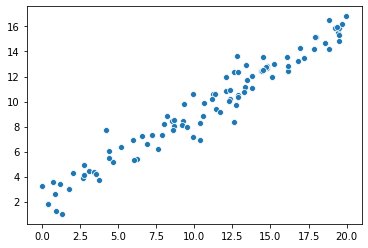

In [ ]:
sns.scatterplot(x,y)

In [ ]:
with pm.Model() as Reg_model:
    #priors
    theta = pm.Normal('theta', mu=0, sd = 14, shape = [14])
    ϵ = pm.HalfNormal('ϵ', 5)
    
    μ = theta[0] + theta[1] * x + theta[2]*x**2
    
    #likelihood
    y_obs = pm.Normal('y_obs', mu = μ, sd = ϵ, observed = y)
    
    trace_Reg = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, theta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 71 seconds.


C:\Users\Admin\.conda\envs\tensorflow\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002533C956248>,
      dtype=object)

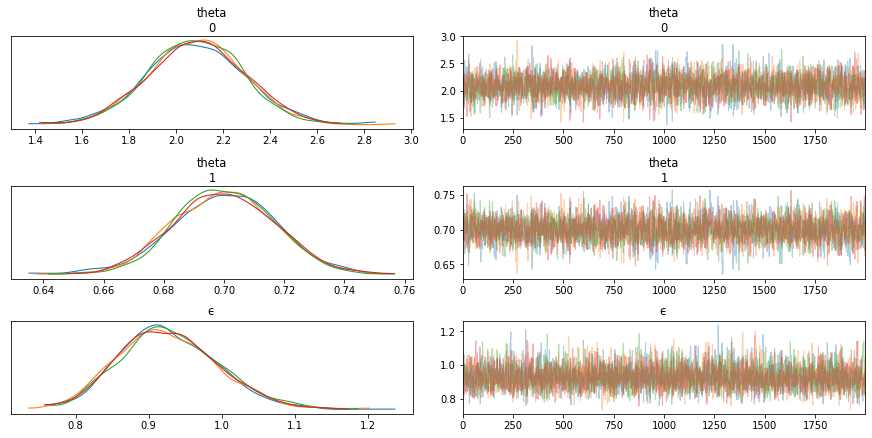

In [ ]:
az.plot_trace(trace_Reg)

In [ ]:
az.summary(trace_Reg)

C:\Users\Admin\.conda\envs\tensorflow\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta[0],2.086,0.205,1.705,2.474,0.004,0.003,3172.0,3133.0,3193.0,2944.0,1.0
theta[1],0.700,0.017,0.670,0.733,0.000,0.000,3138.0,3138.0,3156.0,3208.0,1.0
ϵ,0.928,0.068,0.801,1.051,0.001,0.001,4132.0,4108.0,4151.0,4255.0,1.0


In [ ]:
#same as MLE
mean_theta_0 = trace_Reg['inter'].mean()
mean_theta_1 = trace_Reg['slope'].mean()

In [ ]:
i = range(0, len(trace_Reg['inter']), 2)

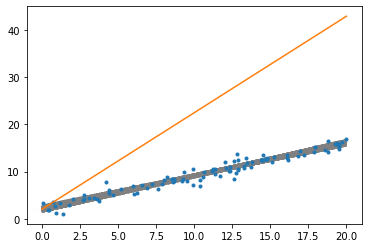

In [ ]:
plt.plot(x, trace_Reg['inter'][i] + trace_Reg['slope'][i]*x[:,np.newaxis],c='gray', alpha=0.5)
plt.plot(x,y, '.')
x1 = np.linspace(0, 20, 1000)
plt.plot(x1, mean_theta_0 + mean_theta_0*x1)
plt.show()

In [ ]:
trace_Reg['inter'].shape

(8000,)

In [ ]:
from scipy.stats import distributions as dist

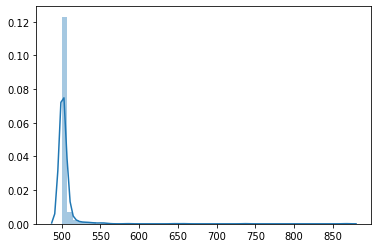

In [ ]:
theta_1 = dist.norm(0, 14).rvs(1000)
e = dist.halfcauchy(500).rvs(1000)
sns.distplot(e)